🔴 **Project Title** : MNIST Digits Classification

🔴 **Aim of the Project** : This project will classify different digits and predict accordingly.

🔴 **Dataset** : https://www.kaggle.com/avnishnish/mnist-original

🔴 **Domain** : Machine Learning

🔴 **Libraries used :** ```Numpy, Pandas, Matplotlib, Seaborn, Tensorflow, Keras```

🔴 **Special Credit** : Try to implement more than three machine learning algorithms and make a comparison between them, then conclude about the best fit algorithm to create the model. All the algorithms must be checked through the accuracy scores to determine the best fitted model

🔴 **Module** : Basic Projects of Machine Learning

*********************************************************************


## Importing Libraries

In [32]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import random

## Dataset

- **Train Dataset:**
> X_train -> (images)

> y_train -> (labels)

- **Test Dataset:**
> X_test -> (images)

> y_test -> (labels)

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
# view of actual dataset
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Data Preprocessing and Visualisation

## Data Preprocessing

#### Scaling the Data

**We know that RGB values ranges from ```0 to 255``` so, dividing the images(values) with 255 will help us to scale the values between ```0 to 1```.**

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
print('Dataset Data Type: ', X_train.dtype)
print('Maximum Value: ' ,X_train.max())
print('Minimum Value: ', X_train.min())

Dataset Data Type:  float64
Maximum Value:  1.0
Minimum Value:  0.0


### Data Visualisation

#### y_train (labels) - Count

C:\Users\Sriniketh J\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


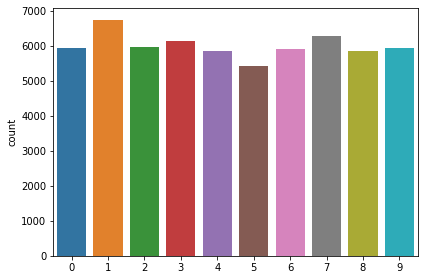

In [10]:
sns.countplot(y_train)
plt.tight_layout()
plt.show()

#### Displaying the Data (random 6 images)

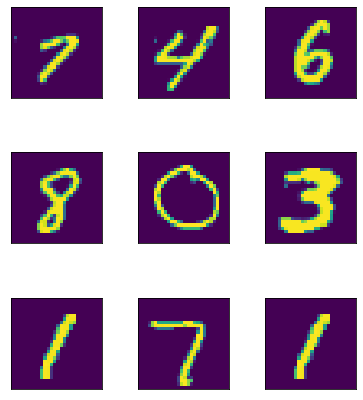

In [11]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[random.randint(0, 100)])

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

## Model Building

### Model - 1

In [12]:
print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

(10000,)
(10000, 10)


In [13]:
model_1 = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(128, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [16]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1, 28,28)

In [17]:
model_1.fit(X_train, y_train, epochs= 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.9082
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1564 - accuracy: 0.9550
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9693
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0831 - accuracy: 0.9756
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0656 - accuracy: 0.9808
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9839
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9869
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9887
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0308 - accuracy: 0.9912
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9926

In [18]:
scores_basic = model_1.evaluate(X_test, y_test)
print('Accuracy: ',scores_basic[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9794
Accuracy:  97.93999791145325


### Model - 2

In [19]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [20]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [21]:
train_images.shape

(60000, 28, 28, 1)

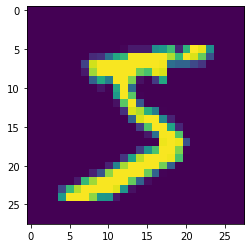

In [22]:
plt.imshow(np.squeeze(train_images[0]))
plt.show()

In [23]:
model_2 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_2.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2265 - accuracy: 0.9556
Epoch 2/4
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0565 - accuracy: 0.9827
Epoch 3/4
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 4/4
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0366 - accuracy: 0.9891


In [26]:
scores_basic = model_2.evaluate(test_images, test_labels)
print('Accuracy: ',scores_basic[1] * 100)

313/313 [==============================] - 3s 8ms/step - loss: 0.0570 - accuracy: 0.9852
Accuracy:  98.51999878883362


In [27]:
cnn_prediction = model_2.predict(test_images)
model_2_predict_labels = [np.argmax(i) for i in cnn_prediction]

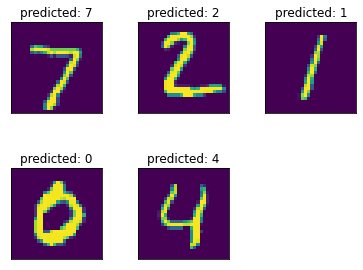

In [29]:
for i in range(5):
  plt.subplot(3, 3, 1+i)
  plt.xticks([])
  plt.yticks([])
  plt.title("predicted: " + str(model_2_predict_labels[i]))
  plt.imshow(np.squeeze(test_images[i]))

plt.subplots_adjust(left=0.1,
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)